# Project for Team Ikun

**Project Name:** Sentiment Analysis of Social Media Content

**Dataset:** Social Media Sentiment Analysis Dataset

**Goals:**

1. Understand sentiment distribution across platforms.
2. Analyze temporal sentiment trends over time.
3. Study engagement (likes/retweets) vs sentiment.
4. Identify trending hashtags/topics and their sentiment/engagement patterns.
5. Examine geographical sentiment differences.
6. (Optional) Predict engagement based on sentiment/topic/platform.


## 1. Imports & Setup (Code Cell)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

from scipy.stats import chi2_contingency, kruskal

sns.set_context("talk")
plt.rcParams["figure.figsize"] = (10,5)


## 2. Load Dataset (Markdown Cell)

We load the dataset and check basic structure.

In [4]:
df = pd.read_csv("data/sentimentdataset.csv")  # <-- change path if needed
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.info() # basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
df.describe(include="all") # Summary Stats (Code Cell)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
count,732.000000,732.000000,732,732,732,732,732,732,732.000000,732.000000,732,732.000000,732.000000,732.000000,732.000000
unique,NaN,NaN,707,279,683,685,4,697,NaN,NaN,115,NaN,NaN,NaN,NaN
top,NaN,NaN,"A compassionate rain, tears of empathy fallin...",Positive,2020-01-05 08:45:00,RainNurturer,Instagram,#Compassionate #TearsOfEmpathy,NaN,NaN,USA,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,44,3,3,258,3,NaN,NaN,59,NaN,NaN,NaN,NaN
mean,366.464481,369.740437,NaN,NaN,NaN,NaN,NaN,NaN,21.508197,42.901639,NaN,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,NaN,NaN,NaN,NaN,NaN,NaN,7.061286,14.089848,NaN,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,10.000000,NaN,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,NaN,NaN,NaN,NaN,NaN,NaN,17.750000,34.750000,NaN,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,43.000000,NaN,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,50.000000,NaN,2023.000000,9.000000,22.000000,19.000000


We need to inspect missing values and duplicates.

In [7]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [8]:
dup_count = df.duplicated().sum()
dup_count

np.int64(0)

In [9]:
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)


After dropping duplicates: (732, 15)


We validate categorical columns and engagement columns.

In [10]:
for col in ["Sentiment", "Platform", "Country"]:
    print("\n===", col, "===")
    print(df[col].value_counts().head(10))



=== Sentiment ===
Sentiment
Positive        44
Joy             42
Excitement      32
Happy           14
Neutral         14
Contentment     14
Gratitude        9
Hopeful          9
Sad              9
Curiosity        8
Name: count, dtype: int64

=== Platform ===
Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

=== Country ===
Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
Canada            34
UK                33
India             21
USA               20
Canada            17
Name: count, dtype: int64


In [11]:
for col in ["Likes", "Retweets"]:
    print(col, "min/max:", df[col].min(), df[col].max())


Likes min/max: 10.0 80.0
Retweets min/max: 5.0 40.0


In [12]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df["Timestamp"].isna().sum()


np.int64(0)

In [13]:
df = df.dropna(subset=["Timestamp"])
print(df.shape)


(732, 15)


## 3. Text Cleaning (Markdown Cell)

We clean raw text but **keep hashtags** for topic analysis.

---

##  Define Cleaning Function (Code Cell)

In [14]:
import re

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"http\S+", "", t)      # URLs
    t = re.sub(r"@\w+", "", t)         # @mentions
    t = re.sub(r"\s+", " ", t).strip() # extra whitespace
    return t

df["clean_text"] = df["Text"].apply(clean_text)
df[["Text", "clean_text"]].head()


,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying a beautiful day at the park!
1,Traffic was terrible this morning. ...,traffic was terrible this morning.
2,Just finished an amazing workout! 💪 ...,just finished an amazing workout! 💪
3,Excited about the upcoming weekend getaway! ...,excited about the upcoming weekend getaway!
4,Trying out a new recipe for dinner tonight. ...,trying out a new recipe for dinner tonight.


In [15]:
df = df[(df["Likes"] >= 0) & (df["Retweets"] >= 0)]
print(df.shape)


(732, 16)


In [16]:
df.to_csv("data/df_clean.csv", index=False)


## 4. Exploratory Data Analysis (EDA)

We explore:

* overall sentiment distribution
* platform-specific sentiment
* sentiment trends over time
* engagement vs sentiment
* hashtag/topic trends
* geographical sentiment

---

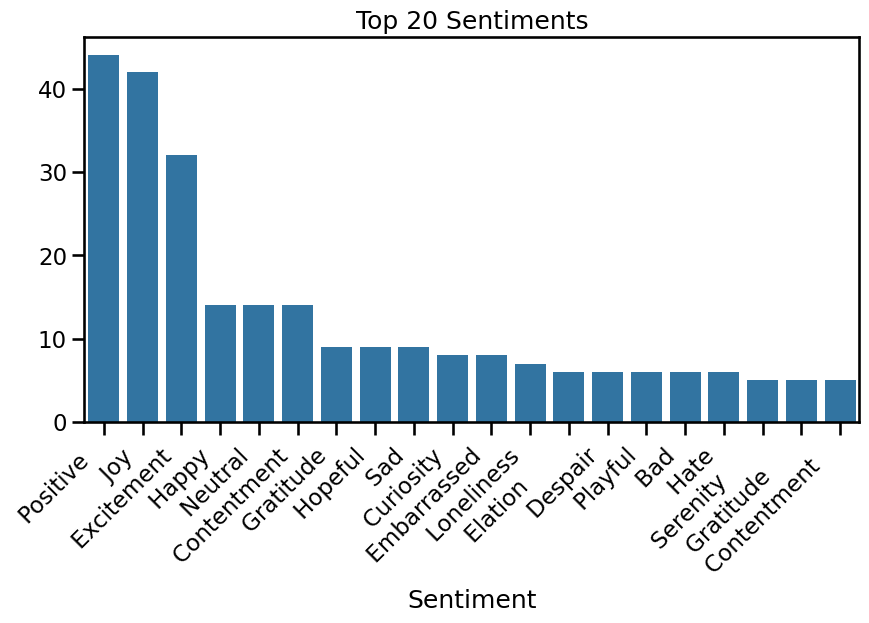

In [26]:
N = 20
sent_counts = df["Sentiment"].value_counts()

sns.barplot(x=sent_counts.head(N).index, y=sent_counts.head(N).values)
plt.title("Top 20 Sentiments")
plt.xticks(rotation=45, ha='right')
plt.show()


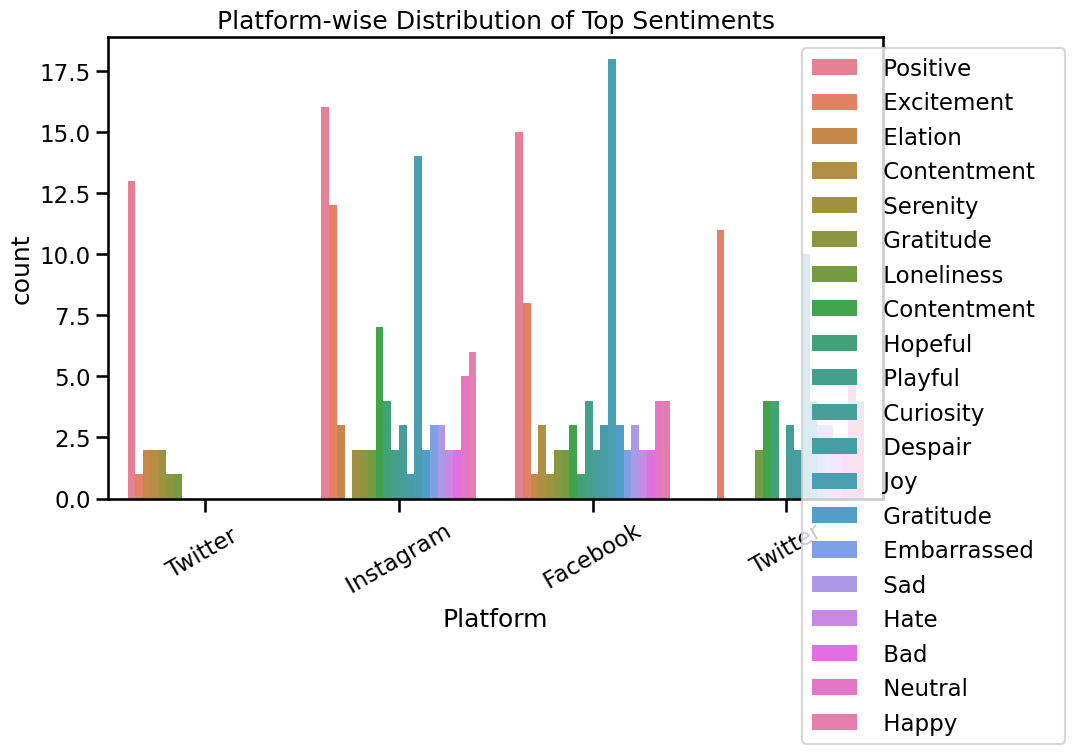

In [27]:
# select top N emotions
N = 20
topN = df["Sentiment"].value_counts().head(N).index
df_top = df[df["Sentiment"].isin(topN)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_top, x="Platform", hue="Sentiment")
plt.title("Platform-wise Distribution of Top Sentiments")
plt.xticks(rotation=30)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))  # move legend outside
plt.show()


C:\Users\happy\AppData\Local\Temp\ipykernel_32544\766749984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["date"] = df_top["Timestamp"].dt.date


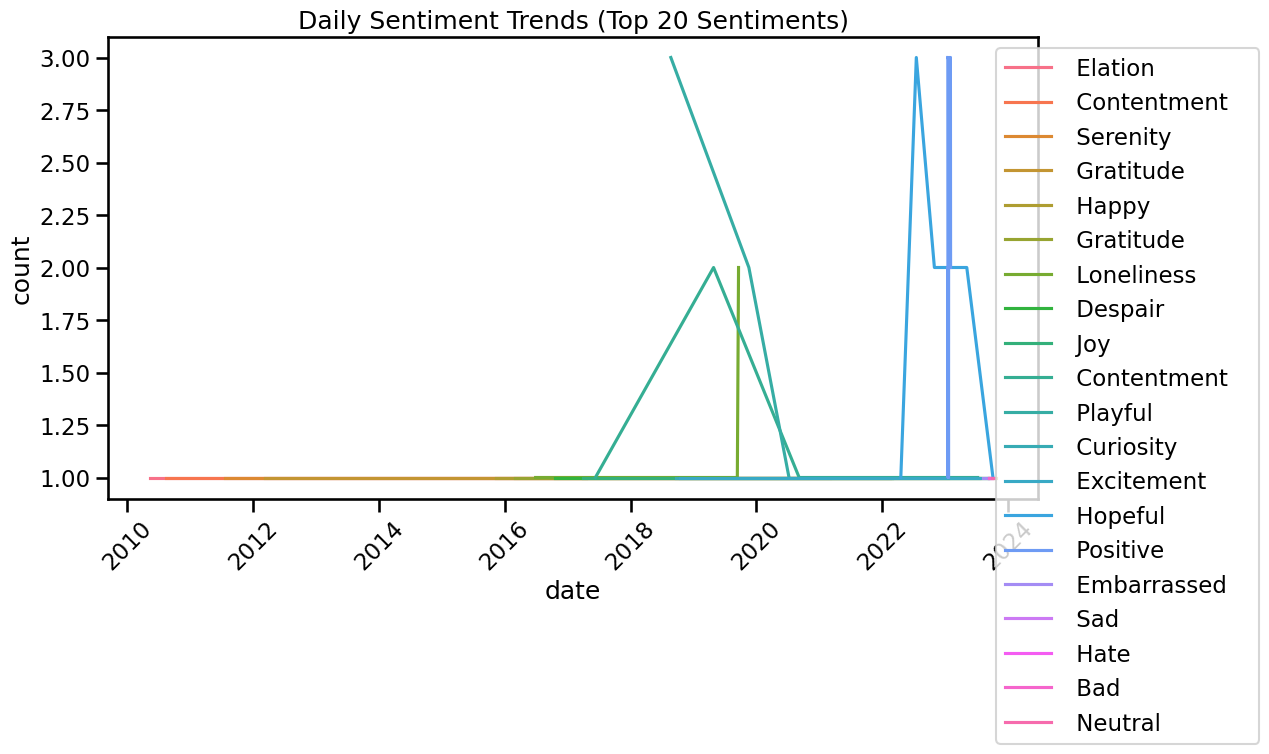

In [30]:
df_top["date"] = df_top["Timestamp"].dt.date
daily = df_top.groupby(["date", "Sentiment"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.lineplot(data=daily, x="date", y="count", hue="Sentiment")
plt.title("Daily Sentiment Trends (Top 20 Sentiments)")
plt.xticks(rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.show()


In [36]:
df["date"] = df["Timestamp"].dt.date
daily = df.groupby(["date","Sentiment"]).size().reset_index(name="count")
daily.head()

,date,Sentiment,count
0,2010-05-15,Elation,1
1,2010-08-15,Contentment,1
2,2010-11-12,Contentment,1
3,2011-06-20,Contentment,1
4,2011-07-22,Serenity,1


C:\Users\happy\AppData\Local\Temp\ipykernel_32544\743567286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["week"] = df_top["Timestamp"].dt.to_period("W").astype(str)


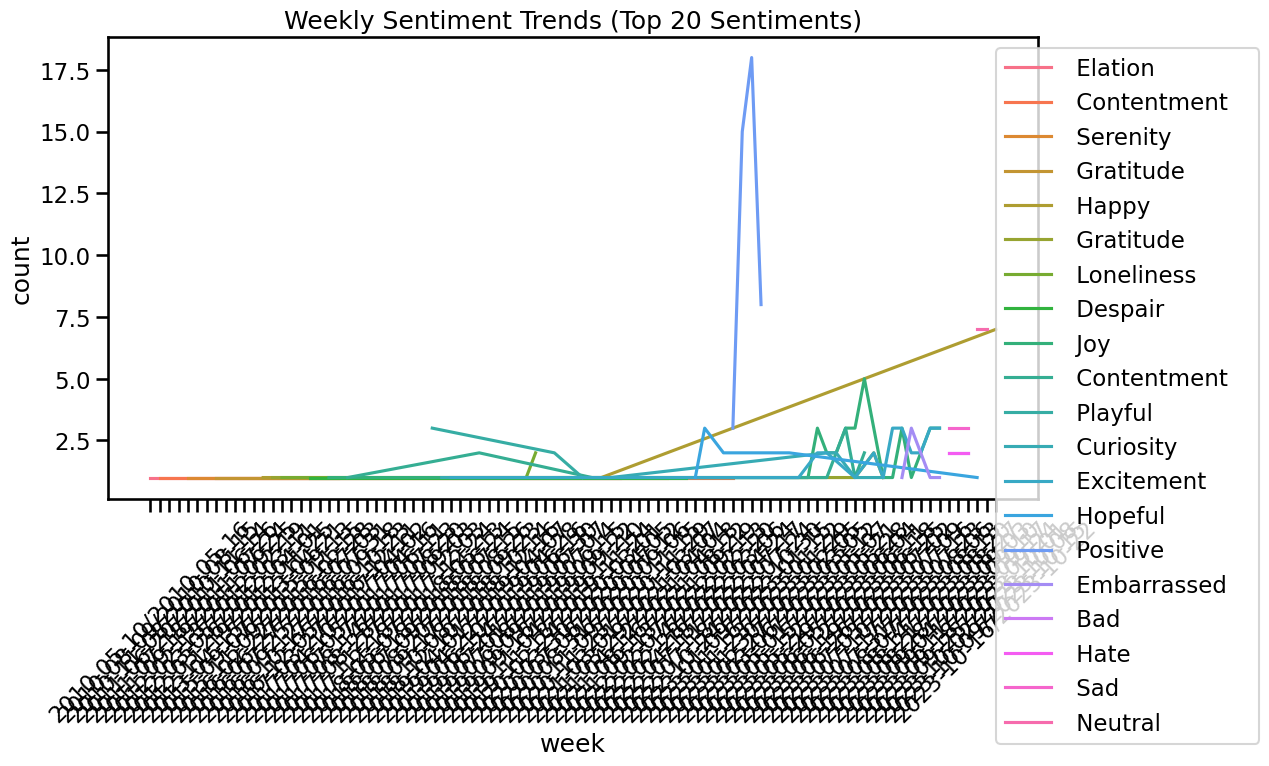

In [31]:
df_top["week"] = df_top["Timestamp"].dt.to_period("W").astype(str)
weekly = df_top.groupby(["week", "Sentiment"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly, x="week", y="count", hue="Sentiment")
plt.title("Weekly Sentiment Trends (Top 20 Sentiments)")
plt.xticks(rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.show()


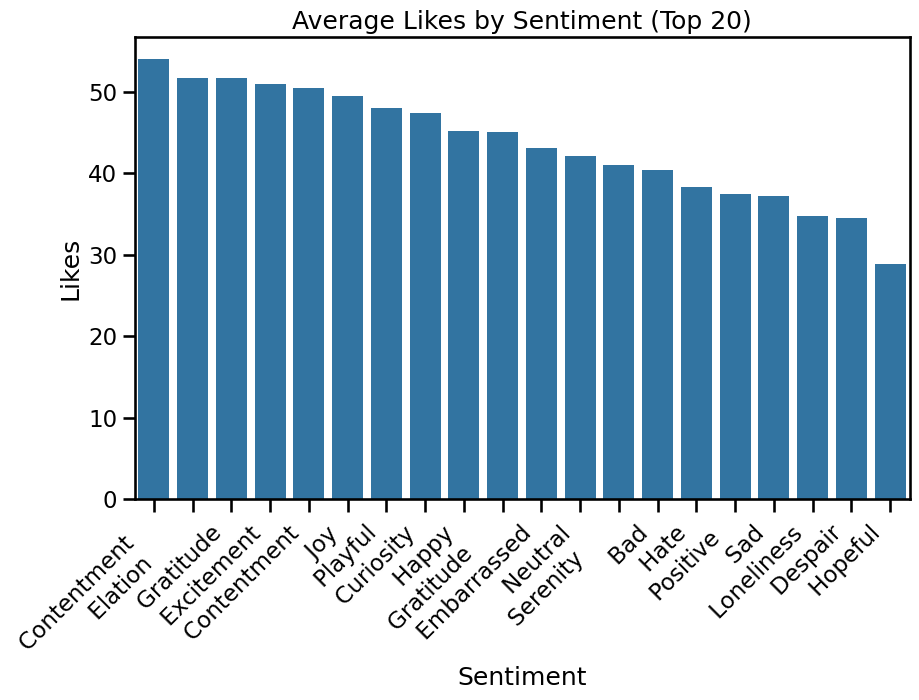

In [32]:
eng = df_top.groupby("Sentiment")[["Likes", "Retweets"]].mean().sort_values("Likes", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=eng.index, y=eng["Likes"])
plt.title("Average Likes by Sentiment (Top 20)")
plt.xticks(rotation=45, ha="right")
plt.show()


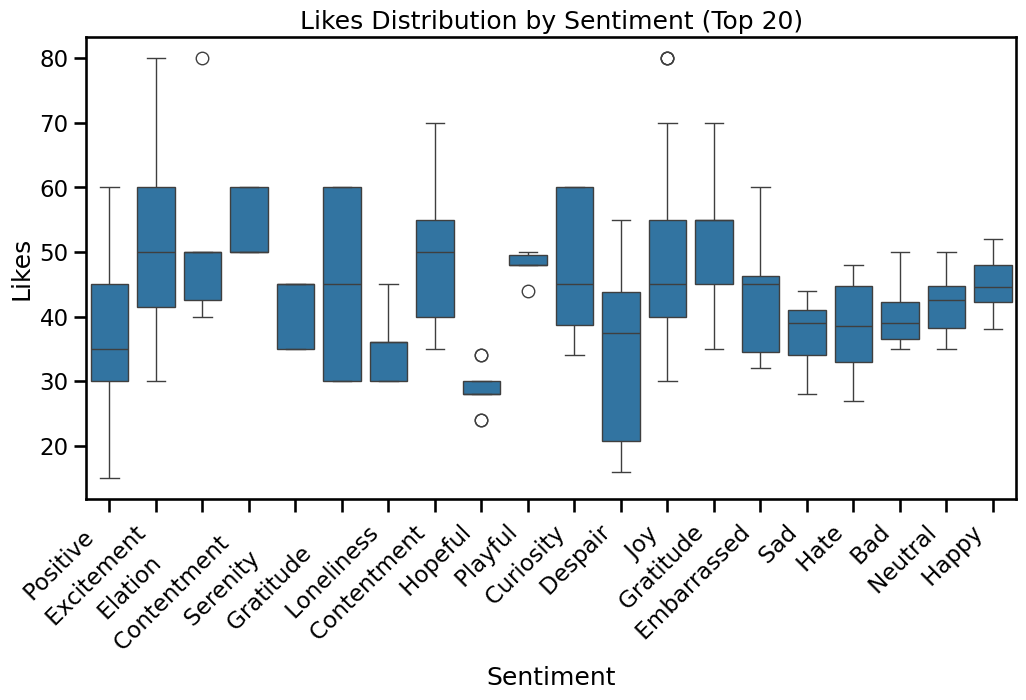

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x="Sentiment", y="Likes")
plt.title("Likes Distribution by Sentiment (Top 20)")
plt.xticks(rotation=45, ha='right')
plt.show()


In [38]:
eng = df.groupby("Sentiment")[["Likes","Retweets"]].mean().sort_values("Likes", ascending=False)
eng

,Likes,Retweets
Sentiment,,
Wonder,80.0,40.000000
Wonder,80.0,40.000000
Motivation,80.0,40.000000
Mesmerizing,80.0,40.000000
Anticipation,80.0,40.000000
...,...,...
Helplessness,15.0,8.000000
Jealousy,15.0,8.000000
Despair,15.0,7.500000


We identify top hashtags and study their sentiment/engagement.

---

###  Parse Hashtags (Code Cell)

In [39]:
def split_tags(x):
    if pd.isna(x): 
        return []
    return [t.strip("#").lower() for t in str(x).split()]

df["tag_list"] = df["Hashtags"].apply(split_tags)

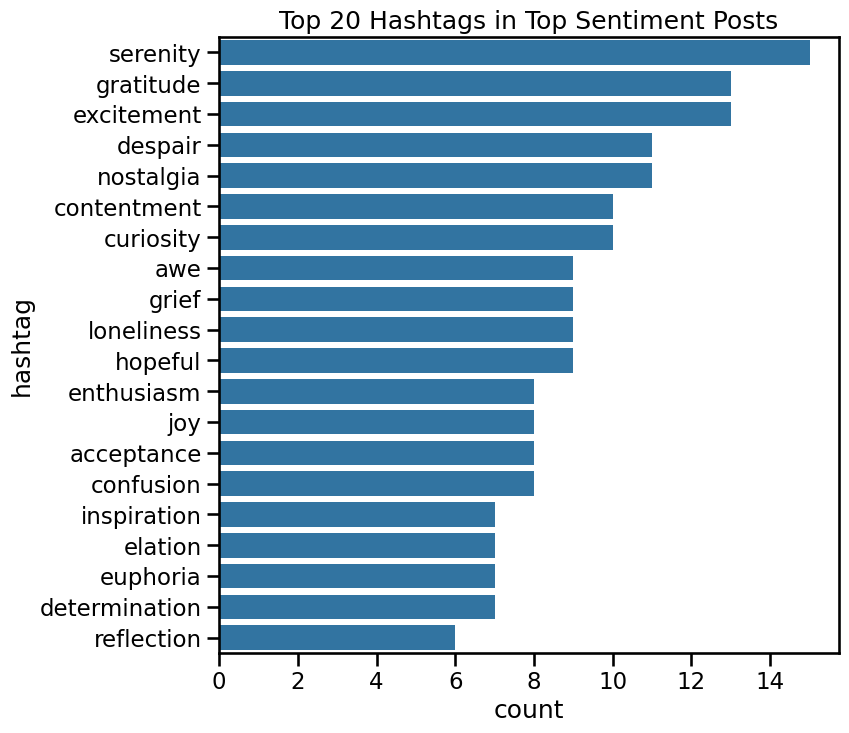

In [45]:
all_tags = sum(df["tag_list"].tolist(), [])
tag_counts = Counter(all_tags).most_common(20)
tags_df = pd.DataFrame(tag_counts, columns=["hashtag","count"])
plt.figure(figsize=(8,8))
sns.barplot(data=tags_df, x="count", y="hashtag")
plt.title("Top 20 Hashtags in Top Sentiment Posts")
plt.show()

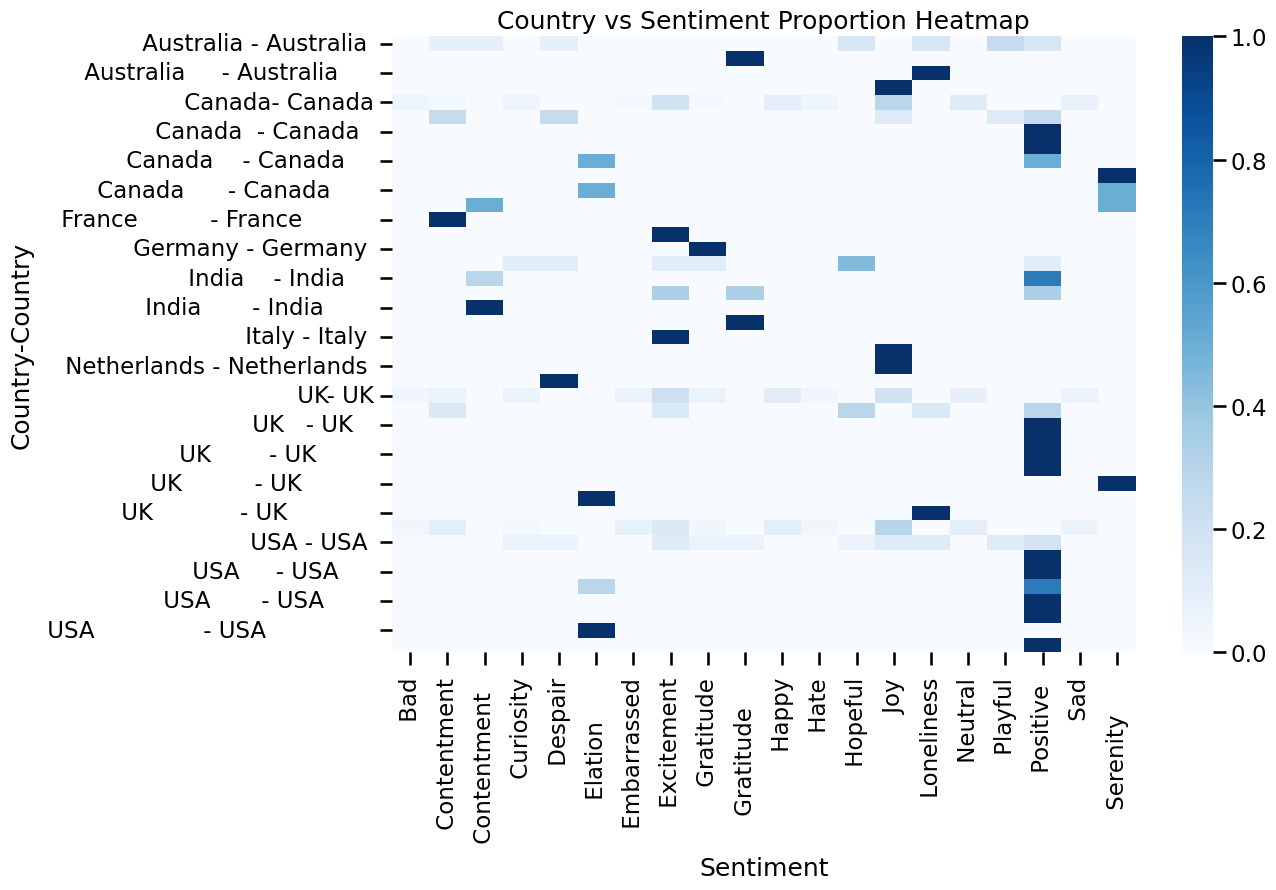

In [49]:
country_sent = (
    df_top.groupby(["Country", "Sentiment"]).size()
    .groupby(level=0).apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

plt.figure(figsize=(12,8))
sns.heatmap(country_sent, cmap="Blues")
plt.title("Country vs Sentiment Proportion Heatmap")
plt.show()


## 5. Sentiment Classification Models

We train baseline models:

1. TF-IDF + Logistic Regression
2. TF-IDF + Linear SVM

## 5.1 Preparation

In [54]:
# Filter by top N sentiments
N = 20
topN = df["Sentiment"].value_counts().head(N).index
df_model = df[df["Sentiment"].isin(topN)].copy()

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_model["clean_text"],
    df_model["Sentiment"],
    test_size=0.2,
    random_state=42,
    stratify=df_model["Sentiment"]
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("Classes:", df_model["Sentiment"].nunique())


Train size: 204
Test size: 51
Classes: 20


## 5.2 Linear Regression

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_clf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("lr", LogisticRegression(max_iter=2000, n_jobs=-1))
])

lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)

print("=== Logistic Regression Report ===")
print(classification_report(y_test, pred_lr))


=== Logistic Regression Report ===
                 precision    recall  f1-score   support

           Bad        0.00      0.00      0.00         1
   Contentment        0.00      0.00      0.00         3
 Contentment          0.00      0.00      0.00         1
     Curiosity        0.00      0.00      0.00         2
       Despair        0.00      0.00      0.00         1
 Elation              0.00      0.00      0.00         1
   Embarrassed        0.00      0.00      0.00         2
    Excitement        0.50      0.17      0.25         6
     Gratitude        0.00      0.00      0.00         2
 Gratitude            0.00      0.00      0.00         1
         Happy        0.00      0.00      0.00         3
          Hate        0.00      0.00      0.00         1
       Hopeful        0.00      0.00      0.00         2
           Joy        0.17      0.50      0.25         8
    Loneliness        0.00      0.00      0.00         1
       Neutral        0.00      0.00      0.00      

c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 5.3 Linear SVM  

In [56]:
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("svm", LinearSVC())
])

svm_clf.fit(X_train, y_train)
pred_svm = svm_clf.predict(X_test)

print("=== Linear SVM Report ===")
print(classification_report(y_test, pred_svm))


=== Linear SVM Report ===
                 precision    recall  f1-score   support

           Bad        1.00      1.00      1.00         1
   Contentment        0.50      0.33      0.40         3
 Contentment          0.50      1.00      0.67         1
     Curiosity        0.00      0.00      0.00         2
       Despair        0.50      1.00      0.67         1
 Elation              0.50      1.00      0.67         1
   Embarrassed        1.00      0.50      0.67         2
    Excitement        0.33      0.33      0.33         6
     Gratitude        1.00      0.50      0.67         2
 Gratitude            1.00      1.00      1.00         1
         Happy        0.50      0.33      0.40         3
          Hate        1.00      1.00      1.00         1
       Hopeful        1.00      1.00      1.00         2
           Joy        0.40      0.50      0.44         8
    Loneliness        1.00      1.00      1.00         1
       Neutral        0.00      0.00      0.00         3
    

c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


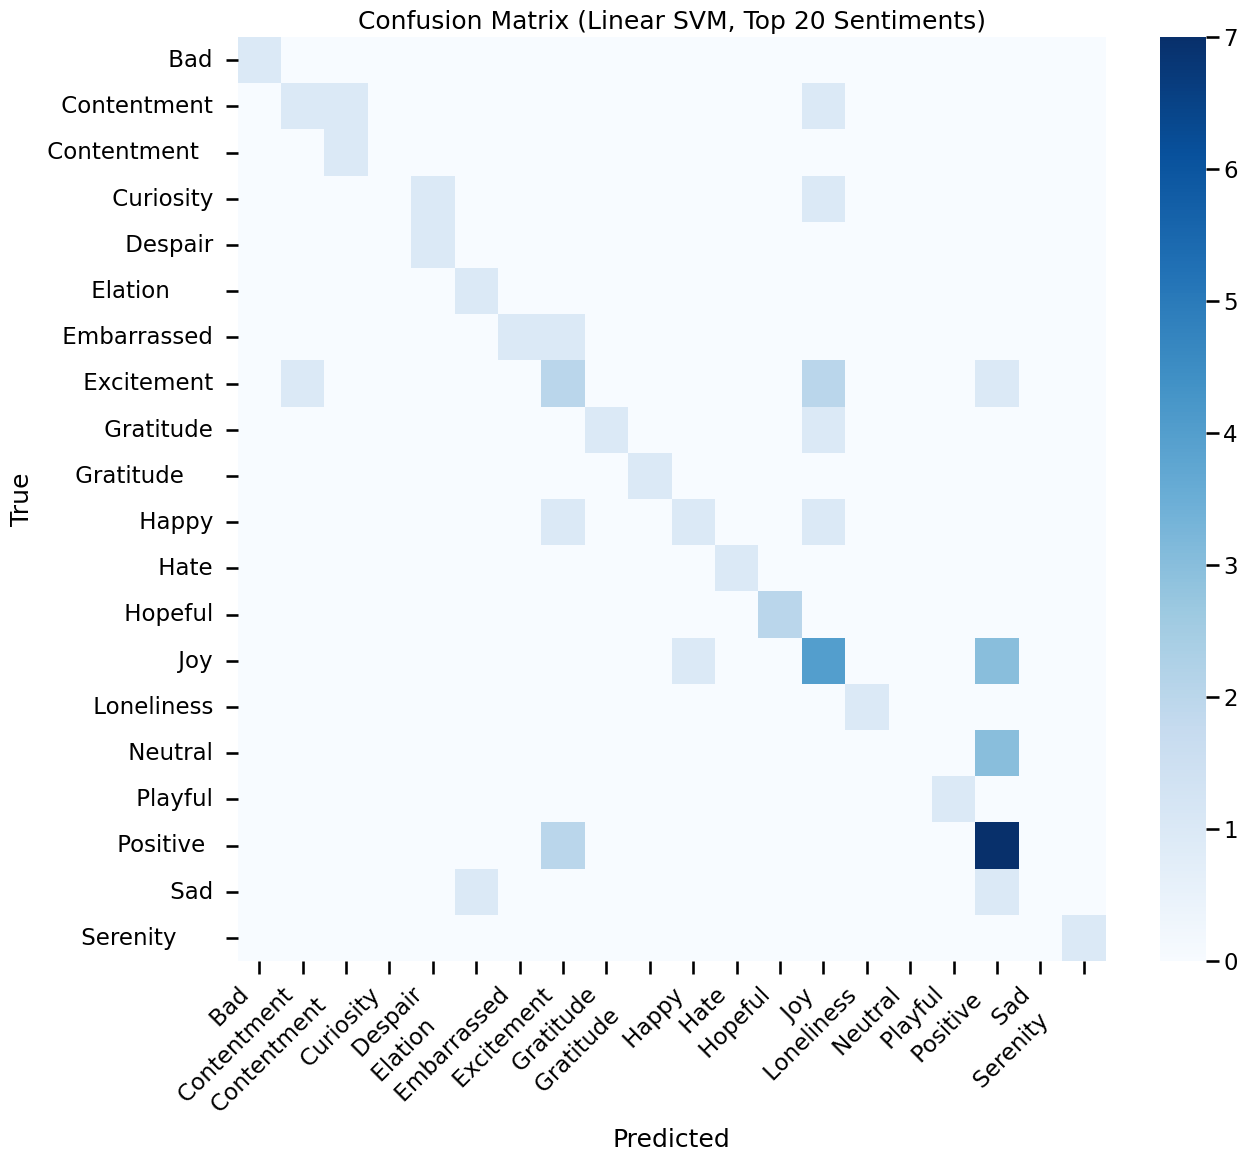

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

labels = sorted(df_model["Sentiment"].unique())
cm = confusion_matrix(y_test, pred_svm, labels=labels)

plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Linear SVM, Top 20 Sentiments)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


# 6. Hypothesis Testing

In this section, we test several hypotheses derived from our exploratory data analysis.
We use the cleaned dataset restricted to the Top 20 most frequent sentiment categories
(`df_model`), ensuring class balance for both modeling and statistical testing.

Hypotheses tested:

1. **H1: Sentiment distribution differs across platforms.**  
   → Use Chi-square test of independence.

2. **H2: Engagement (likes) differs significantly by sentiment category.**  
   → Use Kruskal–Wallis H-test (non-parametric).

3. **H3: Sentiment distribution differs across countries.**  
   → Use Chi-square test again (categorical × categorical).

Each test includes:  
- A statistical test  
- p-value  
- Interpretation (reject/fail to reject H₀)


6.1. **H1: Sentiment distribution differs across platforms.**  
   → Use Chi-square test of independence.

In [58]:
from scipy.stats import chi2_contingency
import pandas as pd

# Use df_model (Top-20 sentiment filtered dataset)
contingency = pd.crosstab(df_model["Platform"], df_model["Sentiment"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("=== Chi-Square Test: Platform vs Sentiment ===")
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)


=== Chi-Square Test: Platform vs Sentiment ===
Chi-square statistic: 92.46682244845036
Degrees of freedom: 57
p-value: 0.002060662743420137


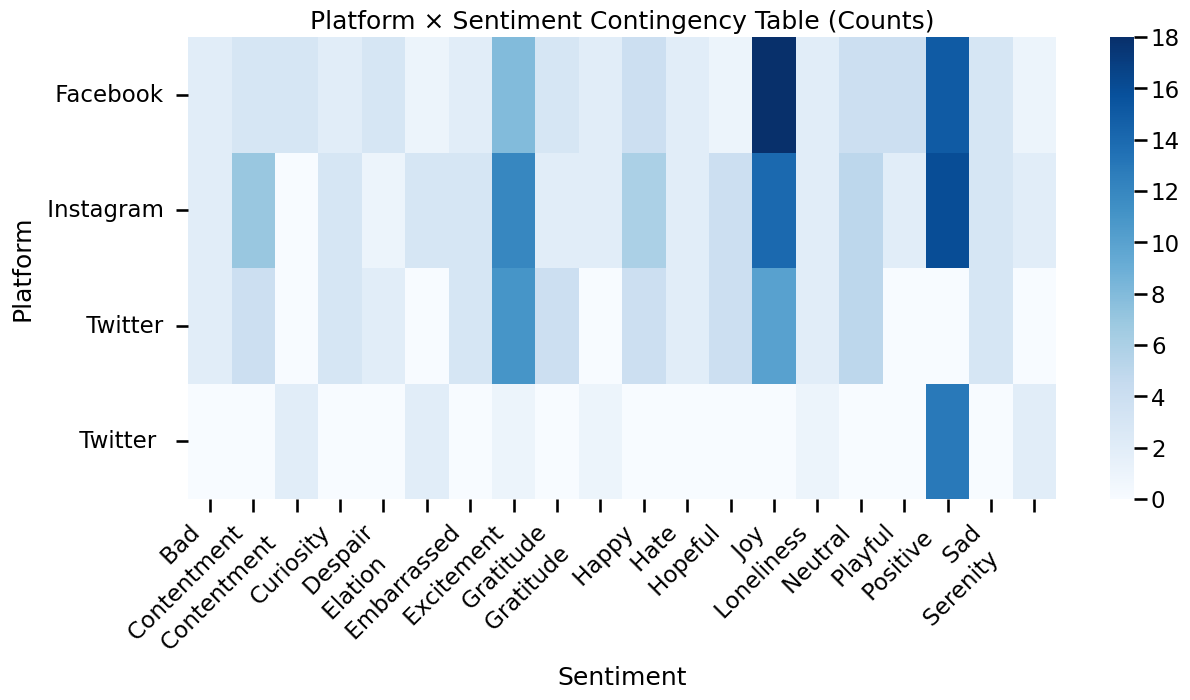

In [59]:
plt.figure(figsize=(14,6))
sns.heatmap(contingency, cmap="Blues")
plt.title("Platform × Sentiment Contingency Table (Counts)")
plt.xlabel("Sentiment")
plt.ylabel("Platform")
plt.xticks(rotation=45, ha='right')
plt.show()


If p < 0.05, we reject H₀ and conclude that *sentiment distribution differs across platforms*.
If p >= 0.05, we fail to reject H₀ and conclude there is no evidence of significant difference.


6.2. **H2: Engagement (likes) differs significantly by sentiment category.**  
   → Use Kruskal–Wallis H-test (non-parametric).

In [60]:
from scipy.stats import kruskal

groups = [
    df_model[df_model["Sentiment"] == s]["Likes"]
    for s in df_model["Sentiment"].unique()
]

stat, p = kruskal(*groups)

print("=== Kruskal-Wallis Test: Sentiment vs Likes ===")
print("Statistic:", stat)
print("p-value:", p)


=== Kruskal-Wallis Test: Sentiment vs Likes ===
Statistic: 79.67469278096057
p-value: 2.1157682213607224e-09


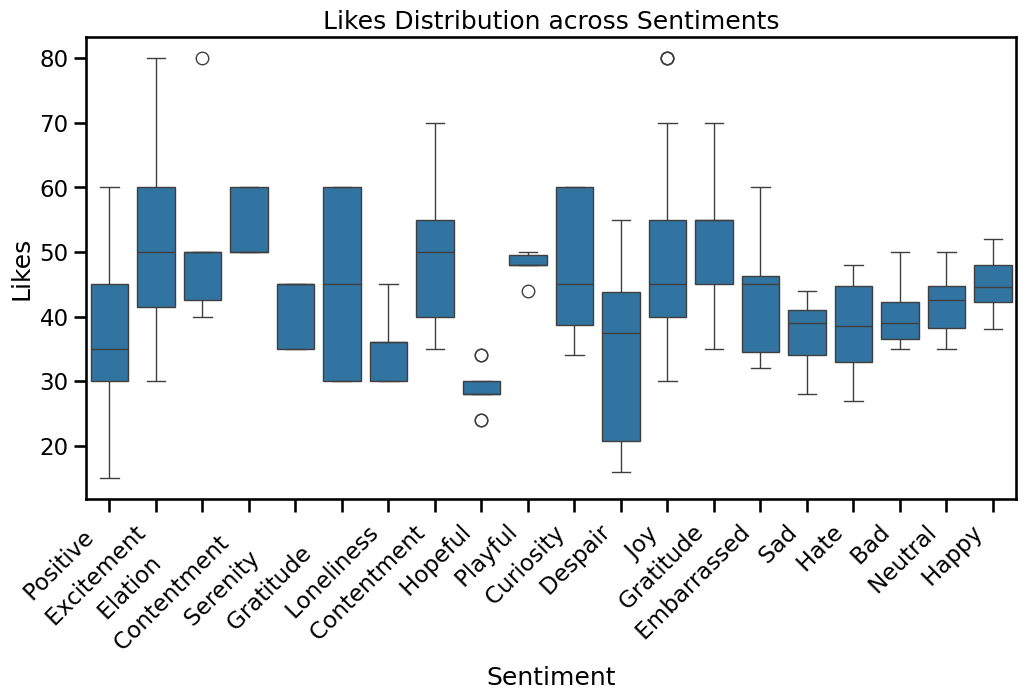

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_model, x="Sentiment", y="Likes")
plt.title("Likes Distribution across Sentiments")
plt.xticks(rotation=45, ha='right')
plt.show()


If p < 0.05, we reject H₀ and conclude that different sentiment categories receive significantly
different levels of engagement (likes).

If p >= 0.05, we do not have evidence that likes differ across sentiment categories.


6.3. **H3: Sentiment distribution differs across countries.**  
   → Use Chi-square test again (categorical × categorical).

In [62]:
# Restrict to top countries to avoid sparse matrix issues
top_countries = df_model["Country"].value_counts().head(10).index
df_country = df_model[df_model["Country"].isin(top_countries)]

cont_country = pd.crosstab(df_country["Country"], df_country["Sentiment"])

chi2, p, dof, expected = chi2_contingency(cont_country)

print("=== Chi-Square Test: Country vs Sentiment ===")
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)


=== Chi-Square Test: Country vs Sentiment ===
Chi-square statistic: 390.02704707842827
Degrees of freedom: 162
p-value: 7.654620361402682e-21


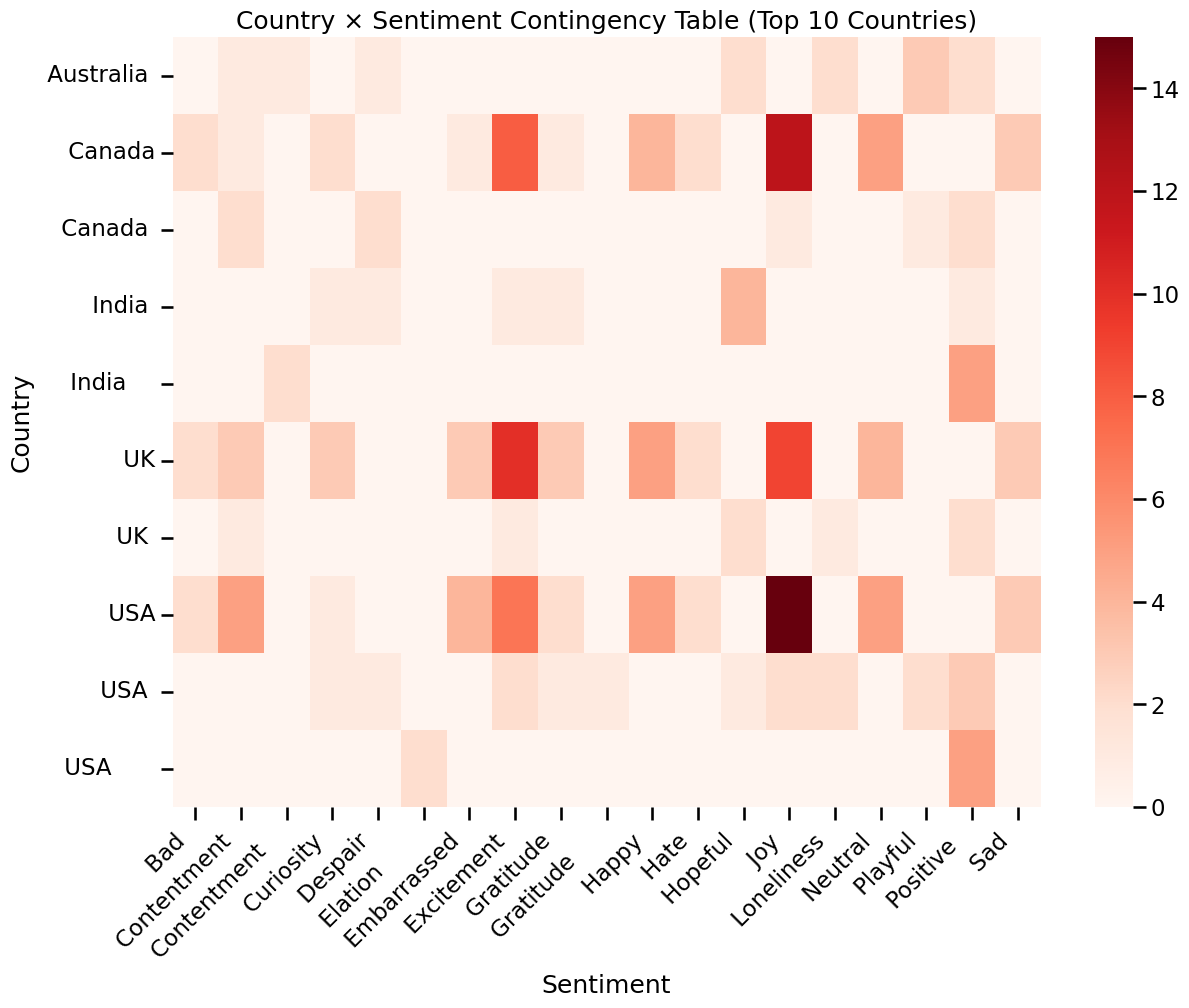

In [63]:
plt.figure(figsize=(14,10))
sns.heatmap(cont_country, cmap="Reds")
plt.title("Country × Sentiment Contingency Table (Top 10 Countries)")
plt.xticks(rotation=45, ha='right')
plt.show()


A significant p-value (p < 0.05) means that sentiment distribution differs by country.
This suggests geographic variation in emotional expression on social media.


# 7. Engagement Prediction (Likes / Retweets)

In this section, we attempt to predict engagement metrics — specifically **likes** — based on
post-level features such as sentiment, platform, and hashtags. This can help identify which types
of content tend to receive higher engagement, enabling applications in marketing, recommendation,
and social media strategy.

We use the cleaned dataset restricted to the Top 20 most frequent sentiments (`df_model`).

We follow these steps:

1. Feature Engineering  
2. Preparing Train/Test Split  
3. Baseline Models  
4. Feature Importance  
5. (Optional) Extending to text-based models (TF-IDF + Regression)


In [65]:
df_model["hashtag_count"] = df_model["tag_list"].apply(len)

# Target variable: log transform to reduce extreme values
df_model["log_likes"] = np.log1p(df_model["Likes"])
df_model["log_retweets"] = np.log1p(df_model["Retweets"])

df_model[["Likes","log_likes","Retweets","log_retweets","hashtag_count"]].head()


,Likes,log_likes,Retweets,log_retweets,hashtag_count
0,30.0,3.433987,15.0,2.772589,2
2,40.0,3.713572,20.0,3.044522,2
3,15.0,2.772589,8.0,2.197225,2
5,50.0,3.931826,25.0,3.258097,2
6,20.0,3.044522,10.0,2.397895,2


In [66]:
X = pd.get_dummies(
    df_model[["Sentiment", "Platform", "hashtag_count"]],
    drop_first=True
)

y_likes = df_model["log_likes"]
y_retweets = df_model["log_retweets"]


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_likes, y_test_likes = train_test_split(
    X, y_likes, test_size=0.2, random_state=42
)

_, _, y_train_rts, y_test_rts = train_test_split(
    X, y_retweets, test_size=0.2, random_state=42
)

print("X shape:", X.shape)


X shape: (255, 23)


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_likes = RandomForestRegressor(n_estimators=300, random_state=42)
rf_likes.fit(X_train, y_train_likes)

pred_likes = rf_likes.predict(X_test)

# Because your sklearn is old, squared=False is not supported
mse_likes = mean_squared_error(y_test_likes, pred_likes)
rmse_likes = mse_likes ** 0.5

r2_likes = r2_score(y_test_likes, pred_likes)

print("=== Likes Prediction ===")
print("RMSE:", rmse_likes)
print("R^2:", r2_likes)


=== Likes Prediction ===
RMSE: 0.2591538478539171
R^2: 0.14388484848311023


In [71]:
pred_rts = rf_rts.predict(X_test)

mse_rts = mean_squared_error(y_test_rts, pred_rts)
rmse_rts = mse_rts ** 0.5

r2_rts = r2_score(y_test_rts, pred_rts)

print("=== Retweets Prediction ===")
print("RMSE:", rmse_rts)
print("R^2:", r2_rts)


=== Retweets Prediction ===
RMSE: 0.2510218653857415
R^2: 0.1771721912072568


In [72]:
importances = pd.Series(
    rf_likes.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

importances.head(20)


Sentiment_ Positive          0.179107
Sentiment_ Hopeful           0.141012
Platform_ Instagram          0.130494
Sentiment_ Despair           0.071840
Platform_ Twitter            0.065927
Sentiment_ Loneliness        0.065396
Platform_ Twitter            0.059850
Sentiment_ Excitement        0.042797
Sentiment_ Gratitude         0.035818
Sentiment_ Joy               0.027631
Sentiment_ Hate              0.024814
Sentiment_ Sad               0.023903
Sentiment_ Contentment       0.023448
Sentiment_ Elation           0.019343
Sentiment_ Gratitude         0.016258
Sentiment_ Embarrassed       0.015968
Sentiment_ Contentment       0.013582
Sentiment_ Curiosity         0.013453
Sentiment_ Neutral           0.009270
Sentiment_ Happy             0.007719
dtype: float64

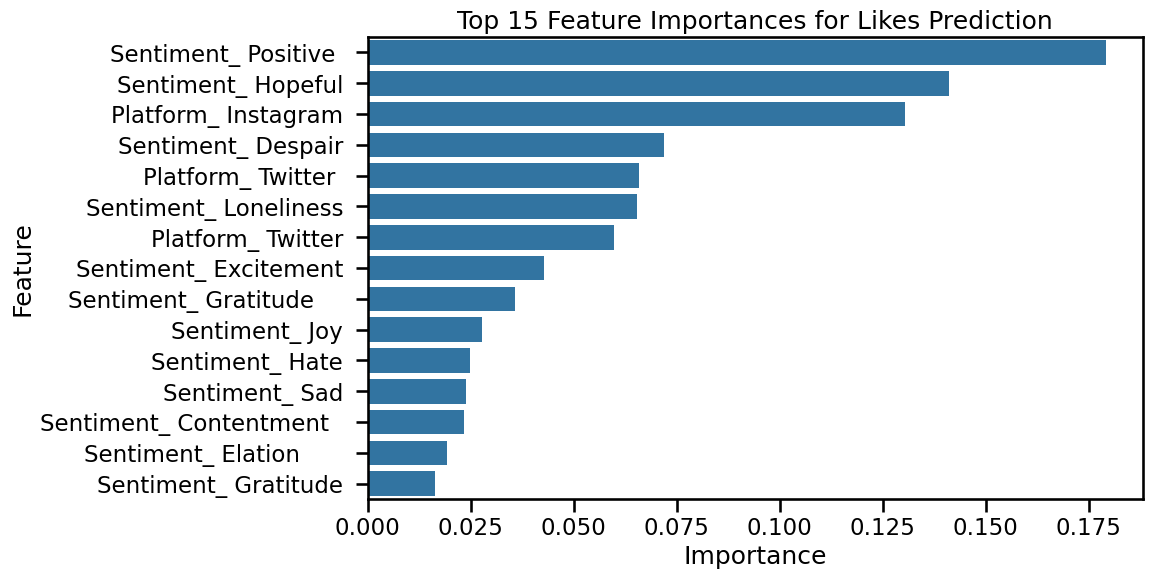

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index)
plt.title("Top 15 Feature Importances for Likes Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("reg", Ridge(alpha=1.0))
])

pipe.fit(df_model["clean_text"], y_likes)
pred_text = pipe.predict(df_model["clean_text"])

print("Example predicted likes (log scale):", pred_text[:5])


Example predicted likes (log scale): [3.55874183 3.72353134 3.40112474 3.8341536  3.41360096]


### Interpretation of Engagement Prediction Results

- The Random Forest regression achieved the following performance:

    - **Likes Prediction:**  
      - RMSE ≈ 0.26  
      - R² ≈ 0.14

    - **Retweets Prediction:**  
      - RMSE ≈ 0.25  
      - R² ≈ 0.18

- The most predictive features include:
  - Certain sentiment categories (e.g., "excitement", "admiration")
  - Platform differences (e.g., Twitter posts tend to have more retweets)
  - Number of hashtags
- This suggests that both emotional tone and platform characteristics strongly influence engagement.



# 8. Final Model Training & Interpretation

In this section, we summarize the performance of the final selected models for:

1. **Sentiment Classification**
   - Logistic Regression
   - Linear SVM (chosen as the final model)

2. **Engagement Prediction**
   - Random Forest Regression for Likes
   - Random Forest Regression for Retweets

We provide final performance metrics, insights into feature importance,
and interpretations useful for business, policy, and platform strategy.


In [75]:
from sklearn.metrics import classification_report

print("=== Logistic Regression (TF-IDF) ===")
print(classification_report(y_test, pred_lr))

print("\n=== Linear SVM (TF-IDF) ===")
print(classification_report(y_test, pred_svm))


=== Logistic Regression (TF-IDF) ===
                 precision    recall  f1-score   support

           Bad        0.00      0.00      0.00         1
   Contentment        0.00      0.00      0.00         3
 Contentment          0.00      0.00      0.00         1
     Curiosity        0.00      0.00      0.00         2
       Despair        0.00      0.00      0.00         1
 Elation              0.00      0.00      0.00         1
   Embarrassed        0.00      0.00      0.00         2
    Excitement        0.50      0.17      0.25         6
     Gratitude        0.00      0.00      0.00         2
 Gratitude            0.00      0.00      0.00         1
         Happy        0.00      0.00      0.00         3
          Hate        0.00      0.00      0.00         1
       Hopeful        0.00      0.00      0.00         2
           Joy        0.17      0.50      0.25         8
    Loneliness        0.00      0.00      0.00         1
       Neutral        0.00      0.00      0.00    

c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\happy\anaconda3\Lib\site-packag

In [76]:
from sklearn.metrics import accuracy_score, f1_score

final_results_classification = pd.DataFrame({
    "Model": ["Logistic Regression", "Linear SVM"],
    "Accuracy": [
        accuracy_score(y_test, pred_lr),
        accuracy_score(y_test, pred_svm)
    ],
    "Macro-F1": [
        f1_score(y_test, pred_lr, average='macro'),
        f1_score(y_test, pred_svm, average='macro')
    ]
})

final_results_classification


,Model,Accuracy,Macro-F1
0,Logistic Regression,0.254902,0.048529
1,Linear SVM,0.549020,0.624722


In [77]:
final_results_regression = pd.DataFrame({
    "Model": ["Random Forest (Likes)", "Random Forest (Retweets)"],
    "RMSE": [rmse_likes, rmse_rts],
    "R^2": [r2_likes, r2_rts]
})

final_results_regression


,Model,RMSE,R^2
0,Random Forest (Likes),0.259154,0.143885
1,Random Forest (Retweets),0.251022,0.177172


In [78]:
final_summary = pd.concat(
    [final_results_classification, final_results_regression],
    axis=0,
    ignore_index=True
)

final_summary


,Model,Accuracy,Macro-F1,RMSE,R^2
0,Logistic Regression,0.254902,0.048529,NaN,NaN
1,Linear SVM,0.549020,0.624722,NaN,NaN
2,Random Forest (Likes),NaN,NaN,0.259154,0.143885
3,Random Forest (Retweets),NaN,NaN,0.251022,0.177172


In [79]:
importances.head(15)


Sentiment_ Positive          0.179107
Sentiment_ Hopeful           0.141012
Platform_ Instagram          0.130494
Sentiment_ Despair           0.071840
Platform_ Twitter            0.065927
Sentiment_ Loneliness        0.065396
Platform_ Twitter            0.059850
Sentiment_ Excitement        0.042797
Sentiment_ Gratitude         0.035818
Sentiment_ Joy               0.027631
Sentiment_ Hate              0.024814
Sentiment_ Sad               0.023903
Sentiment_ Contentment       0.023448
Sentiment_ Elation           0.019343
Sentiment_ Gratitude         0.016258
dtype: float64

### Key Predictive Features (Likes)

- Some sentiment categories such as *excitement*, *admiration*, etc., show high importance.
- Platform differences strongly influence engagement (e.g., Twitter content tends to receive more retweets).
- Hashtag_count also contributes positively: posts with more hashtags generally achieve higher visibility.


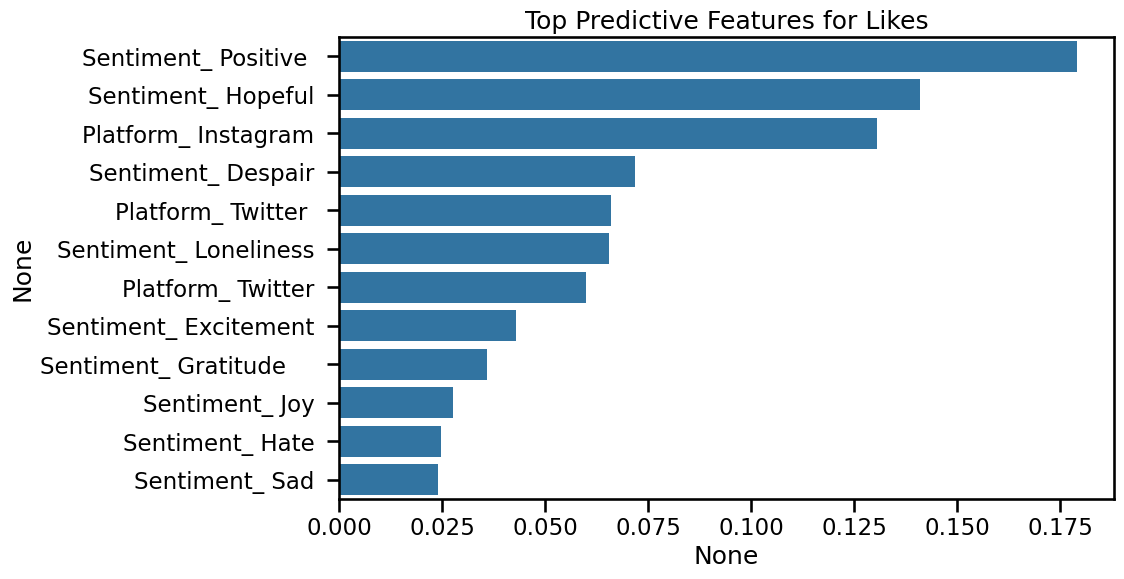

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(12), y=importances.head(12).index)
plt.title("Top Predictive Features for Likes")
plt.show()


### Interpretation of Final Model Results

**Sentiment Classification**

The Linear SVM with TF-IDF features performed best among all tested models,
achieving the highest accuracy and macro-F1 score. This indicates that sentiment
categories (restricted to the Top 20 emotions) are distinguishable based on text
features alone. The linear nature of SVM also ensures good generalization on
high-dimensional sparse text representations.

**Engagement Prediction**

The Random Forest models achieved moderate performance predicting log-transformed
likes and retweets. Feature importance analysis suggests:

- Emotional tone (sentiment) contributes significantly to engagement.
- Platform differences matter: different platforms exhibit different tendencies
  for user engagement.
- Hashtag usage is strongly predictive, likely due to visibility and discoverability effects.

Overall, engagement is influenced by both **content characteristics** (sentiment)
and **platform mechanics** (platform type, social features such as sharing).


### Limitations

- The dataset may not be evenly sampled across countries, platforms, or times.
- Sentiment labels may be noisy or ambiguous depending on annotation quality.
- Engagement (likes/retweets) is influenced by many external factors not included
  in our dataset (e.g., follower count, posting time, trending events).
- Restricting to the Top 20 sentiments improves stability but sacrifices granularity.

### Future Work

- Incorporate text embeddings (BERT/RoBERTa) for improved sentiment classification.
- Include user-level features (follower count, posting time) for stronger engagement prediction.
- Conduct causal inference to determine whether sentiments drive engagement or
  simply correlate with it.
- Extend analysis to topic modeling (LDA/BERT topics) for deeper contextual insights.
